In [1]:
!pip install lifelines


     ---------------------------------------- 0.0/409.4 kB ? eta -:--:--
     ------------------------------------- 409.4/409.4 kB 12.9 MB/s eta 0:00:00
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/db/97/2ac97273f77138c4248ab63cdc4799ea3c87ea2be2d28bb726562e0d0827/formulaic-0.6.4-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     -----------------------

In [2]:
from lifelines.datasets import load_dd

data = load_dd()
data.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


<AxesSubplot: xlabel='timeline'>

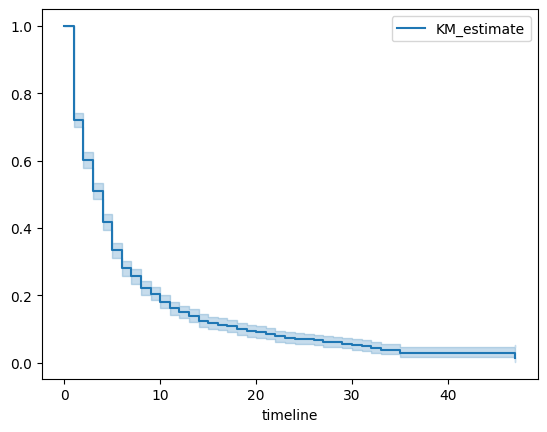

In [3]:
from lifelines.datasets import load_dd
from lifelines import KaplanMeierFitter

# Load the dataset
data = load_dd()

# Create an instance of KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations = data['duration'], event_observed = data['observed'])

# Create an estimate of the survival function
kmf.plot_survival_function()



In [4]:
from lifelines import KaplanMeierFitter

# Create an instance of KaplanMeierFitter
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(durations = data['duration'], event_observed = data['observed'])

# Calculate the median survival time
median_survival_time = kmf.median_survival_time_

print("The median survival time is:", median_survival_time)


The median survival time is: 4.0


In [5]:
!pip install langchain==0.0.18
!pip install pydantic==1.10.9
#!pip install OpenAI
!pip install huggingface-hub

     ---------------------------------------- 0.0/95.9 kB ? eta -:--:--
     ---------------------------------------- 95.9/95.9 kB 5.7 MB/s eta 0:00:00
  Obtaining dependency information for pydantic from https://files.pythonhosted.org/packages/82/06/fafdc75e48b248eff364b4249af4bcc6952225e8f20e8205820afc66e88e/pydantic-2.3.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/148.8 kB ? eta -:--:--
     -------------------------------------- 148.8/148.8 kB 8.7 MB/s eta 0:00:00
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/e9/01/e251a1e721d93c584471d56f7f6d1ae310831522b04d74306a0f522e7c1a/SQLAlchemy-2.0.20-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for annotated-types>=0.4.0 from https://files.pythonhosted.org/packages/d8/f0/a2ee543a96cc624c35a9086f39b1ed2aa403c6d355dfe47a11ee5c64a164/annotated_types-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-core==2.6

In [8]:
import os
#from langchain.llms import OpenAI
from langchain.llms import HuggingFaceHub

# set up the environment with respected API key
#os.environ["OPENAI_API_KEY"] = ""

os.environ["HUGGINGFACEHUB_API_TOKEN"] = "hf_###########"#Enter your API Token

# you can choose between different llm models

# The "temperature" is a hyperparameter that controls the randomness of the model's output. A lower value (like 0.1) makes the output more deterministic, while a higher value makes it more random.
# "max_new_tokens" parameter sets a limit on the maximum number of new tokens (words/characters) that the model can generate as output.

llm = HuggingFaceHub(repo_id="tiiuae/falcon-7b-instruct",model_kwargs={"temperature": 0.1, "max_new_tokens": 600})


# you can use OpenAI GPT models
#llm = OpenAI(model_name="text-davinci-003")


text = "How read book effectively?"

print(llm(text))


To read a book effectively, you should start by setting aside a specific time and place for reading. Make sure to choose a book that interests you and that you are able to focus on. It's also helpful to take notes on what you read and to discuss the book with others. Additionally, try to find a quiet and comfortable environment to read in. Finally, make sure to take breaks and give yourself time to reflect on what you've read.


In [9]:
from langchain import PromptTemplate


# Define the template
template = """
Give me step by step instruction in table format:

{text}
"""

# Create the prompt template object
summary_prompt = PromptTemplate(
    input_variables=["text"], # The name of the input variable
    template=template # The template string
)

# Format the prompt with some text
text = "I want to backflip"
formatted_prompt = summary_prompt.format(text=text)

# Print the formatted prompt
print(llm(formatted_prompt))


1. Sit on the ground with your legs straight in front of you.
2. Place your hands on the ground beside your body.
3. Inhale deeply and press your hands into the ground to lift your body off the ground.
4. Hold this position for a few seconds and then exhale to slowly lower your body back down.
5. Repeat this process a few times to get the hang of it.
6. Once you feel comfortable, try to do it without your hands for added difficulty.
7. Practice this exercise regularly to improve your balance and coordination.
